In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Read the Clean Data CSV file
processedData = pd.read_csv('./data/eng_data.csv')

print(processedData.head().to_markdown())

|    | date       | gender   |   age | product_category   |   quantity |   price_per_unit |   total_amount |   year | month    |   day | day_of_week   |   quarter | age_group   |
|---:|:-----------|:---------|------:|:-------------------|-----------:|-----------------:|---------------:|-------:|:---------|------:|:--------------|----------:|:------------|
|  0 | 2023-11-24 | Male     |    34 | Beauty             |          3 |               50 |            150 |   2023 | November |    24 | Friday        |         4 | 30-39       |
|  1 | 2023-02-27 | Female   |    26 | Clothing           |          2 |              500 |           1000 |   2023 | February |    27 | Monday        |         1 | 20-29       |
|  2 | 2023-01-13 | Male     |    50 | Electronics        |          1 |               30 |             30 |   2023 | January  |    13 | Friday        |         1 | 40-49       |
|  3 | 2023-05-21 | Male     |    37 | Clothing           |          1 |              500 |            50

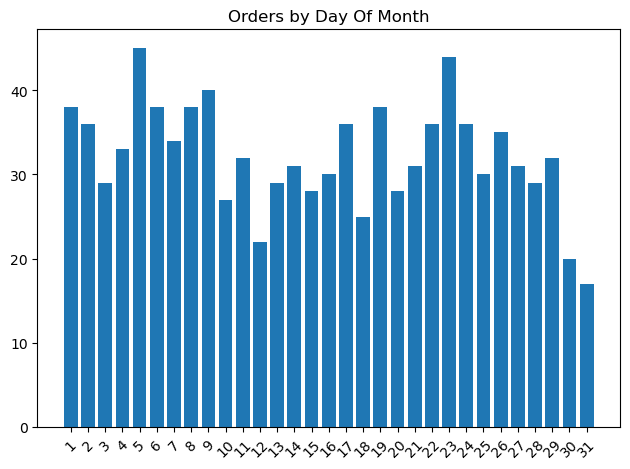

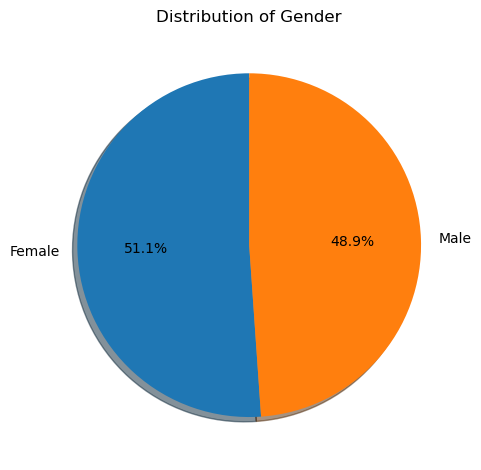

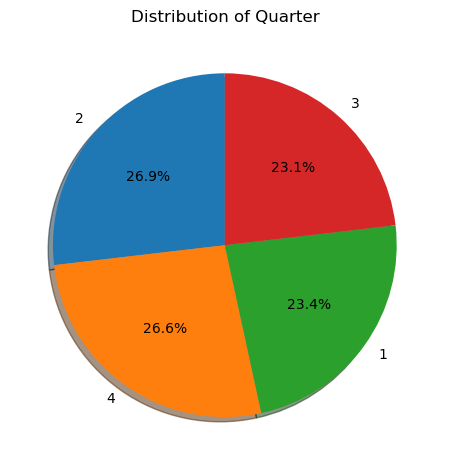

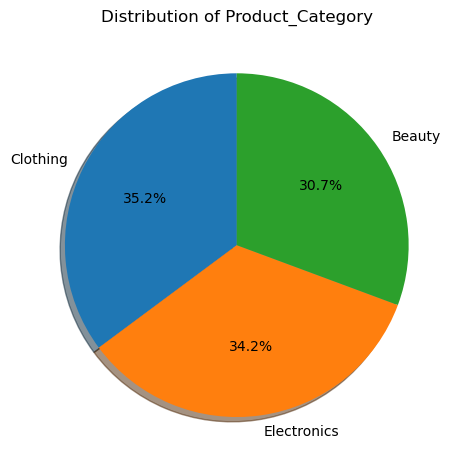

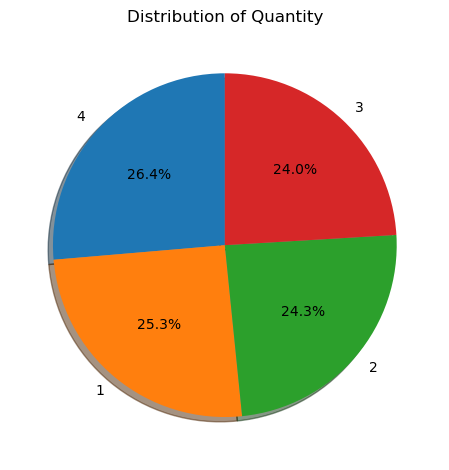

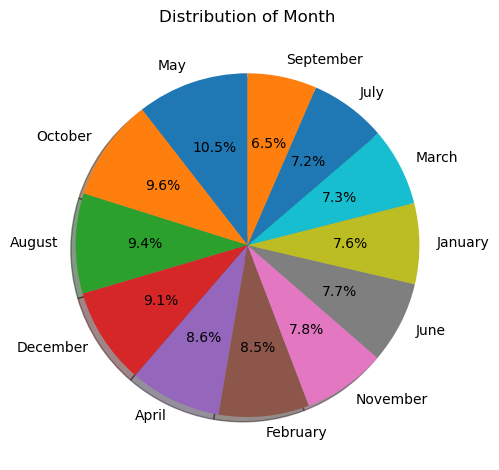

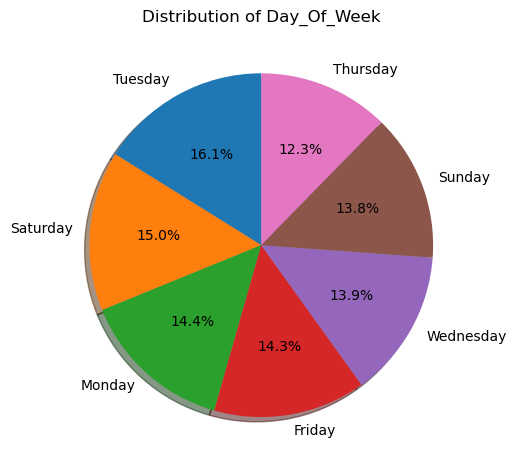

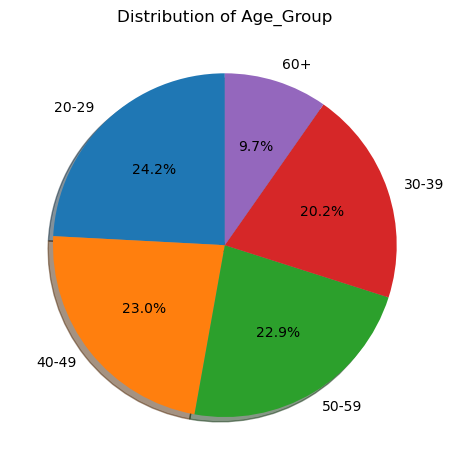

In [52]:
# Univariate Visualizations
values = processedData['day'].value_counts()
plt.bar(values.index, height=values)
plt.xticks(range(1,32), rotation=45)
plt.title('Orders by Day Of Month')
plt.tight_layout()
plt.show()

univariateFileds = ['gender','quarter', 'product_category','quantity','month','day_of_week','age_group']

for field in univariateFileds:
    values = processedData[field].value_counts()
    plt.pie(values, labels=values.index,autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Distribution of ' + field.title())
    plt.tight_layout()
    plt.show()




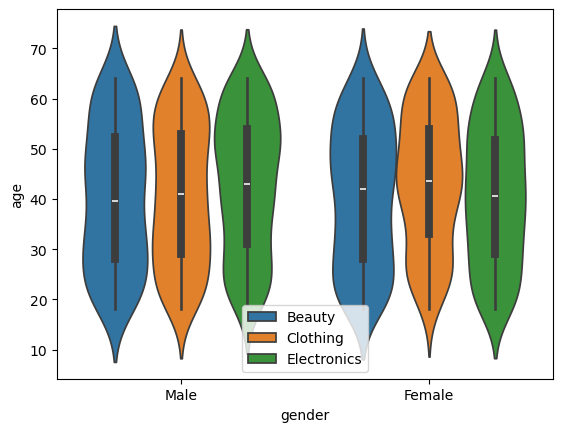

In [16]:
sns.violinplot(data=processedData, x='gender', y='age', hue='product_category', legend=True)
plt.legend(loc='lower center')
plt.show()

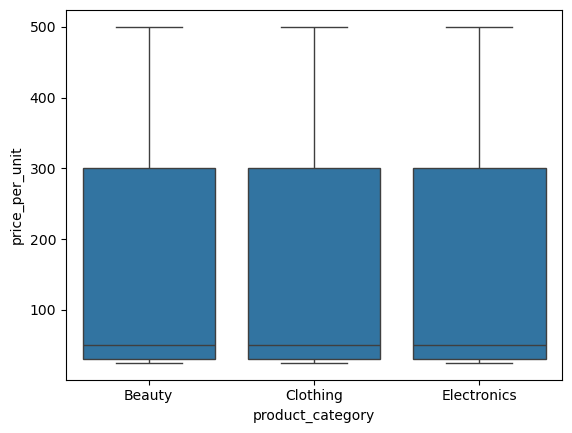

In [17]:
sns.boxplot(data=processedData, x='product_category', y='price_per_unit')
plt.show()

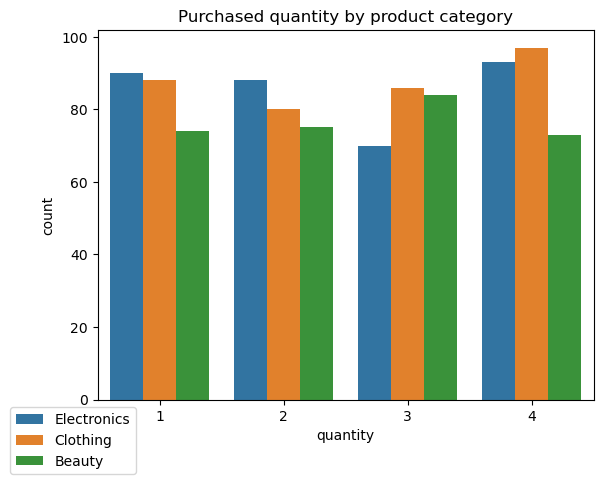

In [18]:
sns.countplot(data=processedData, x='quantity', hue='product_category')
plt.title('Purchased quantity by product category')
plt.legend(loc='lower center', bbox_to_anchor=(-0.05, -0.22))
plt.show()

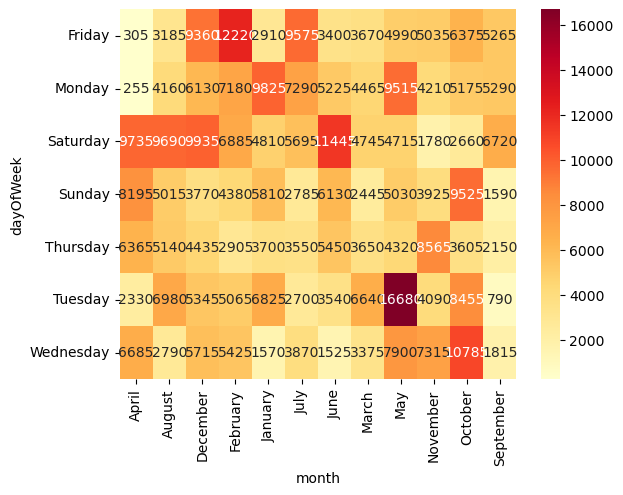

In [19]:
pivot_table = processedData.pivot_table(values='total_amount', index='dayOfWeek', columns='month', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.show()

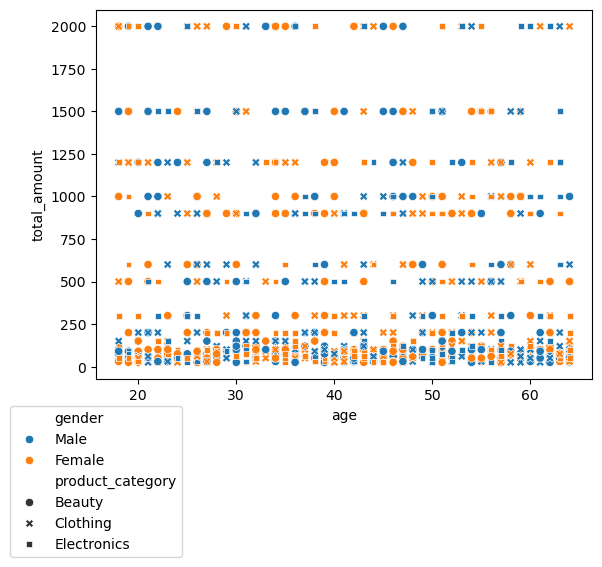

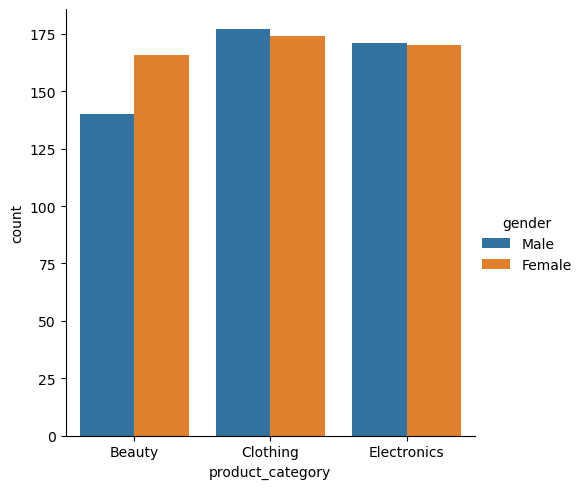

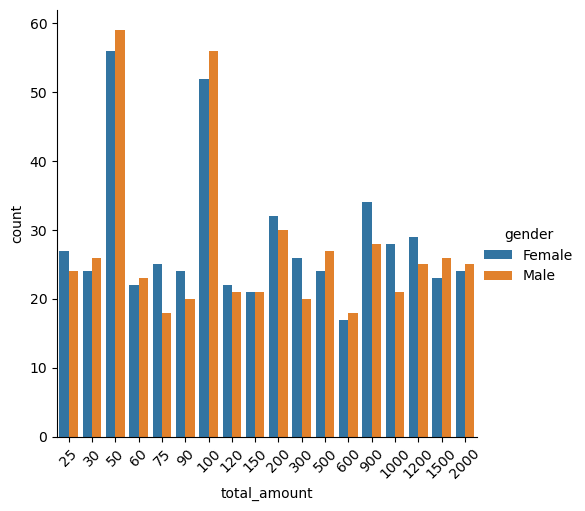

In [20]:
# Age and spending relationship
sns.scatterplot(data=processedData, x='age', y='total_amount', hue='gender', style='product_category')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5))
plt.show()

# Gender distribution across categories
sns.catplot(data=processedData, x='product_category', hue='gender', kind='count')
plt.show()

# Gender distribution across categories
sns.catplot(data=processedData, x='total_amount', hue='gender', kind='count')
plt.xticks(rotation=45)
plt.show()


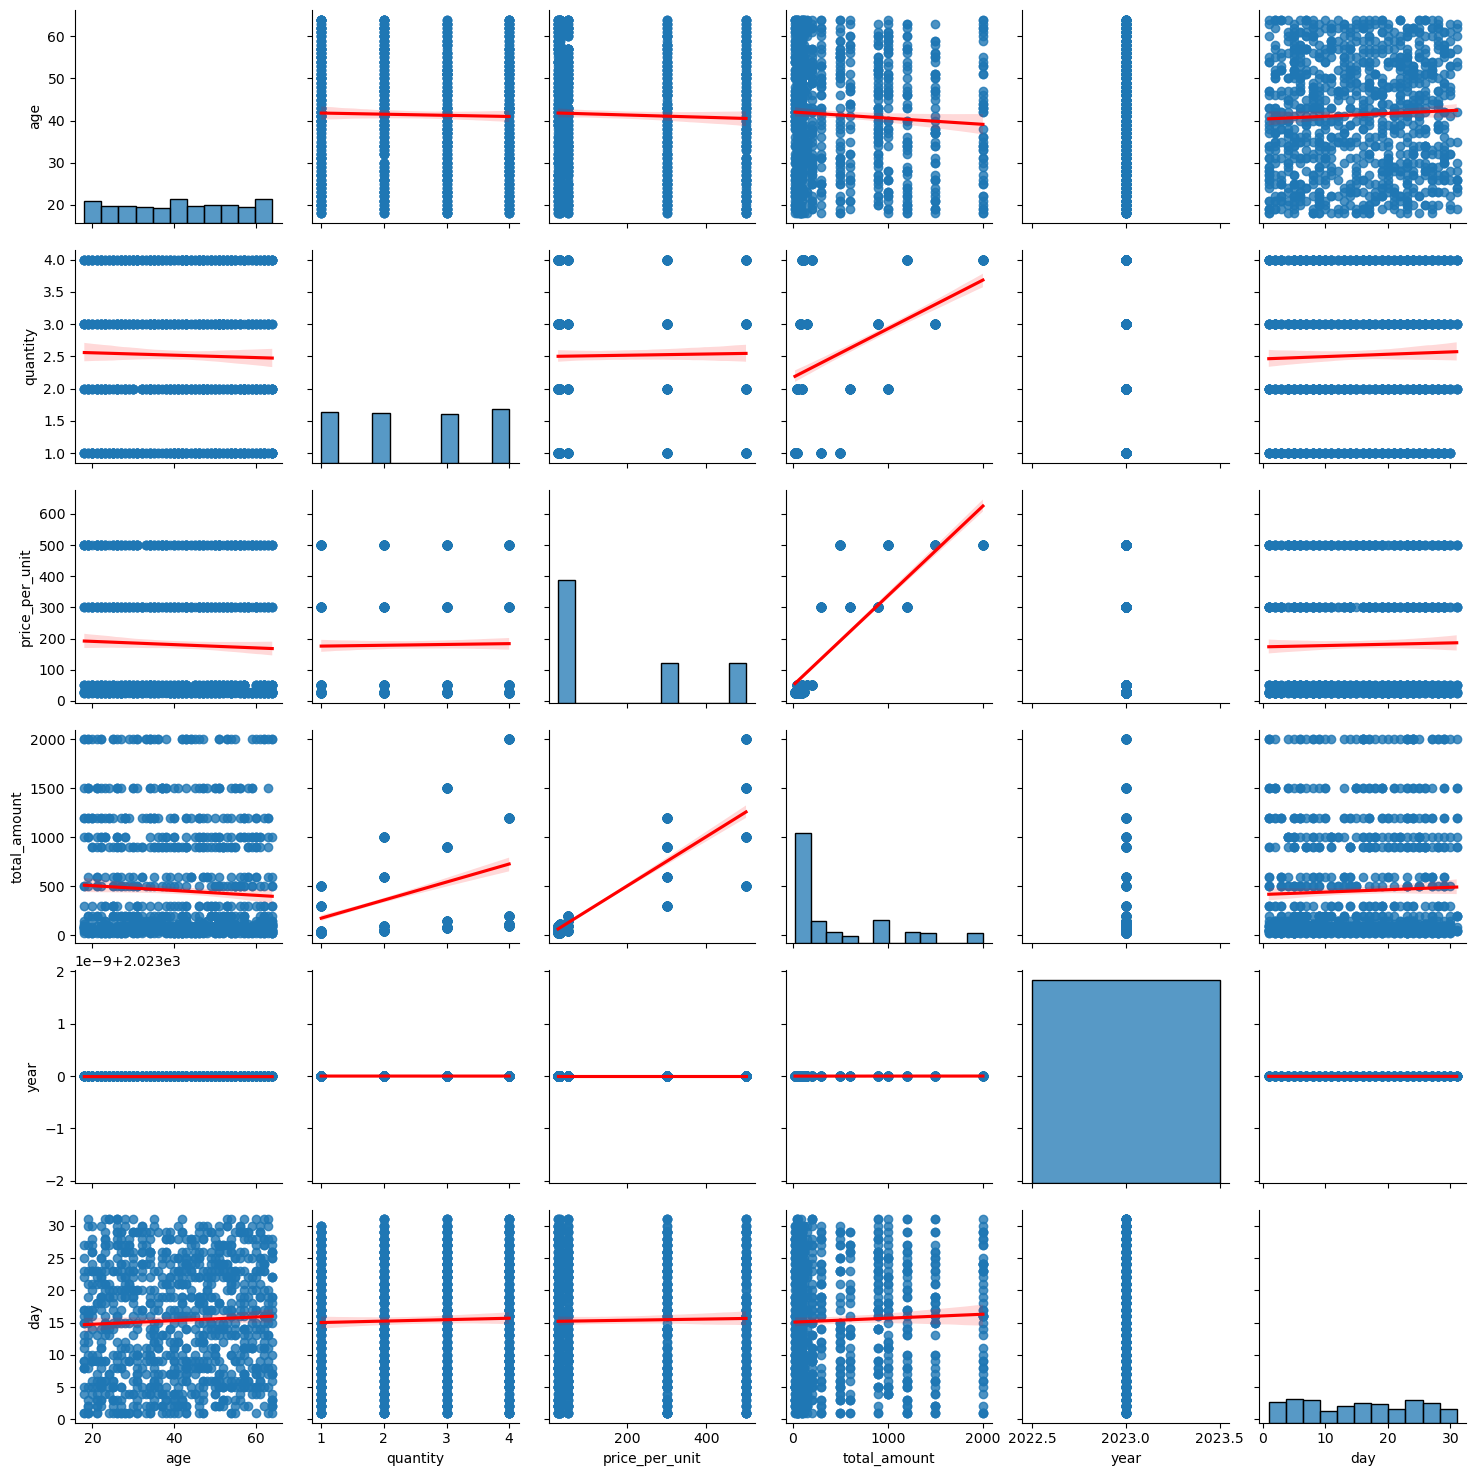

In [21]:
sns.pairplot(processedData, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

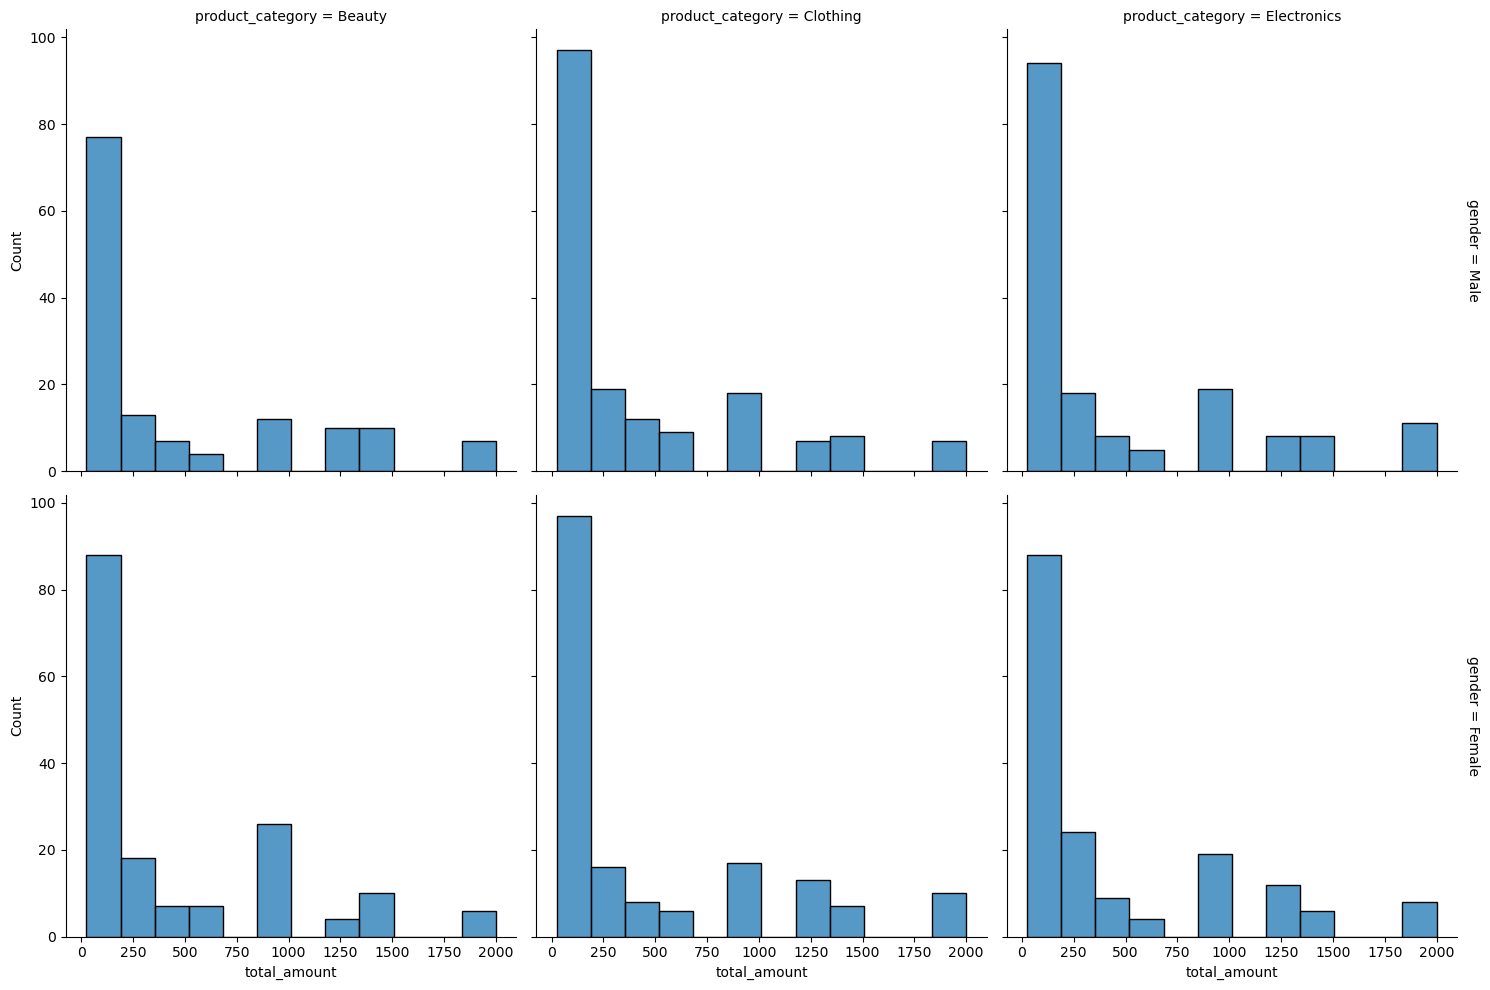

In [22]:
# Total Spend by Gender by Category
sns.displot(processedData, x='total_amount', col='product_category', row='gender', facet_kws=dict(margin_titles=True))

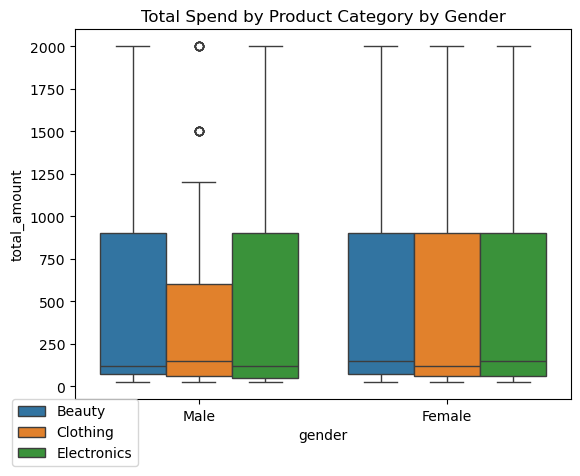

In [23]:
# Total spend per category 
sns.boxplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Product Category by Gender')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.2))
plt.show()


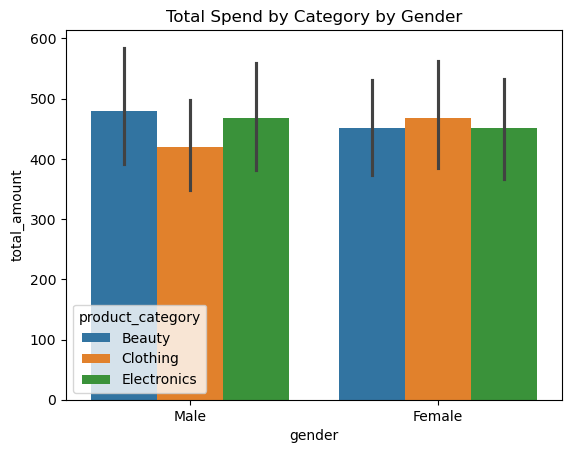

In [24]:
# Total spend per category 
sns.barplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Category by Gender')
plt.show()

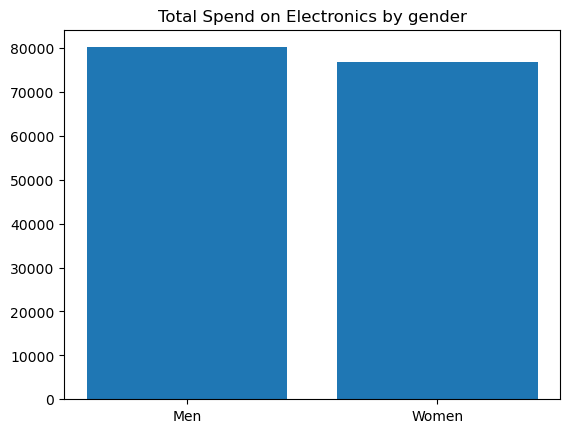

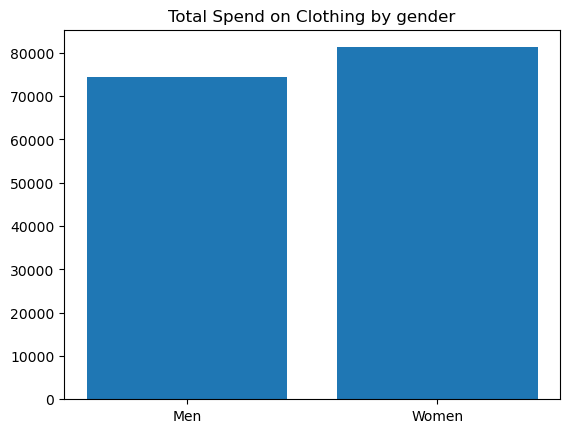

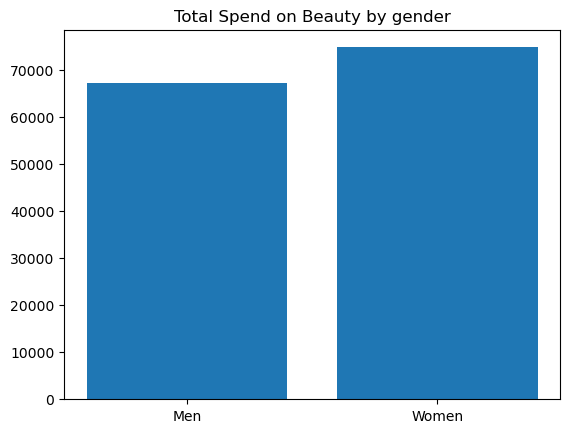

In [25]:
# Raw total spend by category by gender
menDF = processedData[processedData['gender'] == 'Male']
womenDF = processedData[processedData['gender'] == 'Female']

categories = ['Electronics', 'Clothing', 'Beauty']

for category in categories:
    menTotal = menDF[menDF['product_category'] == category]['total_amount'].sum()
    womenTotal = womenDF[womenDF['product_category'] == category]['total_amount'].sum()
    plt.bar(x=['Men', 'Women'], height=[menTotal, womenTotal])
    plt.title('Total Spend on ' + category + ' by gender')
    plt.show()

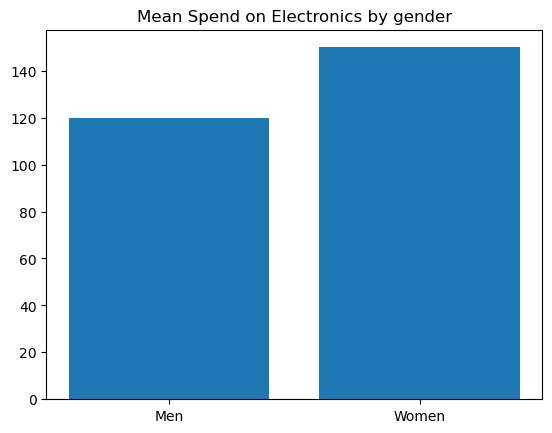

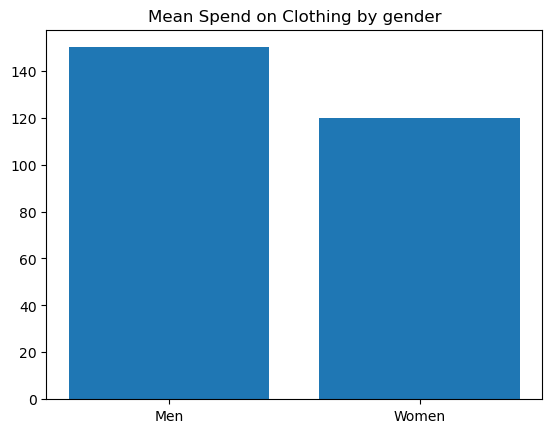

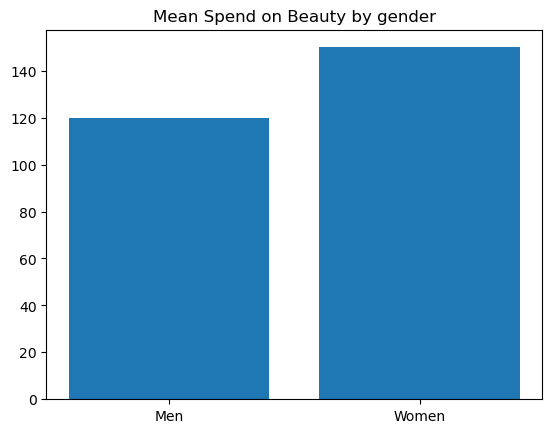

In [26]:
# Raw total spend by category by gender
menDF = processedData[processedData['gender'] == 'Male']
womenDF = processedData[processedData['gender'] == 'Female']

categories = ['Electronics', 'Clothing', 'Beauty']

for category in categories:
    menTotal = menDF[menDF['product_category'] == category]['total_amount'].median()
    womenTotal = womenDF[womenDF['product_category'] == category]['total_amount'].median()
    plt.bar(x=['Men', 'Women'], height=[menTotal, womenTotal])
    plt.title('Mean Spend on ' + category + ' by gender')
    plt.show()

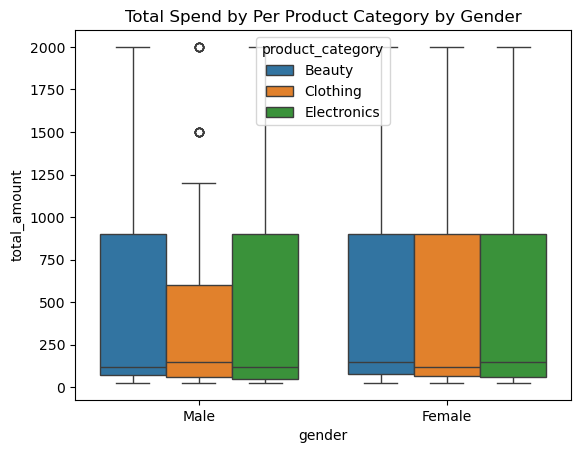

In [27]:
# Total 
sns.boxplot(processedData, x='gender', y='total_amount', hue='product_category')
plt.title('Total Spend by Per Product Category by Gender')
plt.show()

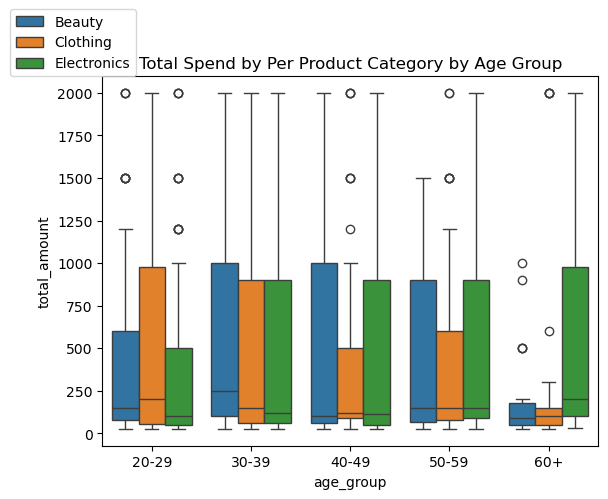

In [28]:
# Total 
sns.boxplot(processedData, x='age_group', y='total_amount', hue='product_category', order=['20-29', '30-39','40-49','50-59','60+'])
plt.title('Total Spend by Per Product Category by Age Group')
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.2))
plt.show()